# Supervised Learning
Supervised learning is a type of machine learning used to train models from __labeled training data__. It allows you to presict output for future or unseen data.

The 2 types of supervised learning are 
1. Regression
2. Classification

## 1. Regression - used when target variable is continuous numeric 
e.g. prediction of house prices, stock prices, height of a person, salary

__Algorithms:__

1. Simple Linear
2. Multiple Linear
3. Polynomial 
4. Ridge Regression
5. Lasso Regression
6. ElasticNet Regression

## 2. Classification - used when target variable is of categorical type
e.g. a transaction is fraudulent or not, patient is diabetic or not, spam/not spam email (2 classes are possible), grades of a student (6 classes from A - F) are possible, movie ratings, classify a trip as long/medium/short distance.
Note: the number of classes can be any number based on the possible scenarios

__Algorithms:__
1. Logistic Regression
2. Decision trees
3. Support Vector Machines etc.

### Examples of supervised learning
1. Weather apps used to predict weather at a given time based on prior knowledge of weather over a perios of time for a particular place.

2. Email filters into inbox(normal/ham) or junk folder(spam) based on past information od spam

3. Netflix/Amazon recommendations - uses what you like and what similar people that likes the movie you liked also liked

Note: A model cannot have more than ONE target/output feature


classification predict/identifies the class variable while categorization organizes data

Grouping - clustering


## Variable types

### Quantitative variables            

- continuous (float)              
- discrete (integer # of kids )   
                                 
                                                                  
### Qualiitative variables
- categorical - nominal or ordinal and binary
- nominal - no order required
- binary - true or false, yes or no
- ordinal - tall>medium>short

When the target feature is quantitative, you go for regression
When the target is qualitative, you go for classification

## Machine Learning model building steps

1. Import the right kind of data according to the problem statement.
2. Explore your data and visualize the data to gain insight about the data(shape, describe, boxplot, graphs, info, etc).
3. Find the relationship between the features and the target i.e. how they are related.
4. Encode all the necessay categorial variables present in the dataset. __MACHINE LEARNING CANNOT DEAL WITH OBJECT TYPE DATA. IT CAN ONLY WORK WITH NUMERIC TYPE DATA SO YOU NEED TO ENCODE THE CATEGORICAL DATA. i.e. CONVERT THEM TO NUMERIC TYPE. The process is called ENCODING.__
5. Identify the target variable and split the features into X(features) and y(target) i.e. isolate/remove your target variable from the features.
6. Split the original dataaset into train set and test set e.g. 80:20 or 70:30 etc (industry dependent) where 80%-training set and 20%-testing set

1000 data points - original dataset

training - 800 data points
testing - 200 data points.
7. Build your machine learning model with the training dataset (features, target).
8. Test your model with the features of the test dataset and observe the prediction output. You then compare the predicted output and the actual target of the test dataset.
9. Use various evaluation metrics for regression and classification to determine how well your model is performing.


ETL - Extract, Transform, Load people prep the data for Data Scientists


# Linear Regression

Regression is the __strength of relationship__ between your features and target variables:

__y = mx + c__

m = regression coefficient which expresses the strength of relationship between the feature and the target

- y = target
- x = feature
- m = slope
- c = intercept

### 1. Simple linear regression:
For simple linear regression, you have one target variable and ONLY one feature

### 2. Multiple linear regression
You have more than one feature

__y = b1x1 + b2x2 + b3x3 +.......+ bnxn + c__

where b1, b2, b3, ...,bn are regression coefficients which express the strength of the relationship between x1, x2, x3...,xn respectively with y.

#### Evaluation metrics for regression
        Root Mean Squared error - root of squared mean error (where error = actual-predicted)
        R2 Score - how the model fits the data
        
### 3. Polynomial



## 1. Import the dataset

In [1]:
# using one of the 7 datasets inbuilt in sklearn
from sklearn.datasets import load_boston

boston = load_boston()  # instantiate it and assign it to a variable

# this is not a dataframe but a Bunch- sklearrn data type
type(boston)

sklearn.utils.Bunch

In [2]:
# check the features in the dataset
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
# check the documentation for the dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

## 2. Explore Data

In [5]:
# remember that it's not a dataframe yet so first convert it to a dataframe
# boston data is an array under data
import pandas as pd
boston_df = pd.DataFrame(boston.data, )
boston_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


Notice that there are no column names

In [6]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


Notice that the output/target MEDV is not included

### Adding the target 

In [7]:
# create a column MEDV and assign the target data to it
boston_df['MEDV'] = boston.target

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [9]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
# check for null values - you'll get True if there is a null value and false if it isn't null
boston_df.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Use .sum() after .isnull() to add up the true and false values. It will show the number of null values for each feature. 0 means there is no null.

In [11]:
# checking for null values
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## 3. Splitting your X and y

X - variable which holds all the features

y - variable which holds the target value

Here you have the liberty to either use the Bunch data type which has separate X(feature) and y(target) already or to drop the target and assign the features to X and target to y

In [12]:
# Option 1: Using the data from sklearn in bunch format - with separate feature and target values already
X = boston.data
y = boston.target

In [13]:
# Option 2: splitting X and y from the dataframe which has features and target
X = boston_df.drop('MEDV', axis=1)  # 1 for column
y = boston_df['MEDV']

## 4. Split the dataset into train and test sets

In [14]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [15]:
# invoke the split method, it will return 4 values which is assigned to variables X train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# test size (0,1):
# 0 denotes that the entire data has been used for training
# 1 denotes that the entire data has been used for testing
# 0.2 - 20% of data is taken for testing
# 0.3 - 30% of data is taken for testing

In [16]:
# check the shape of your split to confirm it's 80:20

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


## 5. Build regression model

In [17]:
#1. import the necessary model function
from sklearn.linear_model import LinearRegression

#2. instantiate the estimator object
model_lr = LinearRegression()

#3. fit the model on the data i.e. training the model with the data - supervised approach
model_lr.fit(X_train, y_train)

print('The intercept for the LR model is:', model_lr.intercept_)
print('The coefficient for all the features:', model_lr.coef_)  # there will be 13 values i.e. 1 value for each feature

The intercept for the LR model is: 40.69881135855521
The coefficient for all the features: [-1.27264773e-01  5.60695259e-02  4.65903493e-02  1.75069088e+00
 -1.92558353e+01  3.57749108e+00 -7.10009639e-03 -1.55175123e+00
  3.16634503e-01 -1.21701176e-02 -1.03792319e+00  9.05514554e-03
 -5.10400467e-01]


Note that without setting the __random state__, i.e. a seed you will get different values each time you run the model because of the random selection of the records during split.

In [18]:
# set the seed to 21, can be any integer value
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
print('The intercept for the LR model is:', model_lr.intercept_)
print('The coefficient for all the features:', model_lr.coef_)  

The intercept for the LR model is: 40.653176529790514
The coefficient for all the features: [-8.77422649e-02  4.87770336e-02  1.94746142e-02  3.06314365e+00
 -1.84821160e+01  3.34704170e+00  3.22024333e-03 -1.42569490e+00
  3.25184188e-01 -1.20259158e-02 -1.05582832e+00  1.07682087e-02
 -5.38356500e-01]


## 6. Evaluate the model

6a. __RMSE__ is used for evaluating regression

error = actual - predicted

when actual > predicted, +ve error value
when actual < predicted, -ve error value

so RMSE is the root of the mean of all squared errors. Squared to take care of -ve values before averaging/mean and root to return it back to previous magnitude

In [19]:
# Evaluate the model - use the same estimator object and the predict function
# Use only your X_test so your model can come up with the predicted target values
y_pred = model_lr.predict(X_test)

In [20]:
# compare your predicted value (y_pred) with the y_test values
# we want to show the values side by side so create a dataframe with values in a dict
pd.DataFrame({'Actual y_test': y_test, 'Predicted y_test':y_pred})

,Actual y_test,Predicted y_test
455,14.1,15.311568
142,13.4,15.324187
311,22.1,26.890855
232,41.7,37.384876
290,28.5,33.375220
...,...,...
486,19.1,20.027912
468,19.1,17.513802
302,26.4,29.172278
244,17.6,16.904621


You can see that there is a deviation in the actual and predicted values so to find the RMSE, import numpy to be able to use the sqrt function. We only get mean_squared_error from sklearn but this is ROOT mean squared error so Numpy will provide the ROOT part which sklearn doesn't.

The mean_sqaured_error function will only accept 2 values (in this case, the actual and pred variables)

In [21]:
from sklearn.metrics import mean_squared_error
import numpy as np

print('RMSE value of testing dataset')
print(np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE value of testing dataset
5.179324335658004


The RMSE tells us that overall there is an average deviation of 5.18
Remember that our y i.e MEDV is in 1000 dollars i.e. x1k. So the RMSE value acceptance is dependent on the problem statement. This may be ok depending on the context/ what y target represents. A +/-$5.17K difference in the house price in this case may be considered acceptable in the real estate field. 

If the RMSE value is too high, it means the model is not good enough. You can try another model type e.g. polynomial or select the features that are best correlated

Note: You only use __linear regression__ if there is a linear relationship between the target and features. Use a scatterplot to check the relationship/spread between the features and the target variable.

If the spread is non linear, you use polynomial regression.


### Note that the above use of multiple features is Multiple Linear Regression and not Linear Regression. You also need to use the features that are good predictors for the target variable i.e features with the best correlation. Refer to IBM DA0101EN - Data Analysis with Python training 

#### 6b. R2 Score
__R2 Score__ is also used to determine how well the model fits the data. Use R2 Score to infer how well the model fits the dataset after using the RMSE

In [22]:
# the method is inbuilt in the linear regression function so you don't need to import any new metric

print('R2 Score is:', model_lr.score(X_test, y_test))

R2 Score is: 0.714936416139223


This score tells us that our model was able to fit about 71% of the data

__Recap from Day 2__

Adjusted R2 is adjusted to accomodate multi features

R2 is also called coefficient of determination. It tells you how the line(model) fits the data points

Acceptable RMSE value is problem specific

# Correlation

Let's you now the relationship between 2 variables/features. 

Correlation is used only for __numeric__ values. For categorical values, __Chi Squared test__ is used

It ranges from -1 to +1

### Types of correlation
- Positive correlation
- Negative Correlation
- No correlation

## Regression equation 
For e.g. house price prediction

y(house price) = b1(no of bedrooms) + b2(sqft) + c

b1 - strength of relationship between the no of rooms and house price column

b2 - will tell us the strength of the relationship between the sqfootage and house price column

The assumption in regression is that the independent variables are independent of each other which in actual fact is incorrect.

- Positive correlation - Direct variation - when the value of one variable increases, the value of the other variable also increases

- Negative Correlation - Indirect variation - when the value of one variable increases, the value of the other variable decreases

Strong +ve correlation values = 0.8 to 1
Strong -ve correlation values = -0.8 to -1


### Factor Analysis
If two independent variables are correlated, one of them will be dropped to avoid multicolinearity. If it's not removed, it will miscalculate the values for b1, b2 i.e. the regression coefficients will be incorrect.

# How to check the correlation?

In [24]:
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


### Make inferences from the correlation

INDUS & DIS columns have a strong negative correlation
INDUS & NOX have a strong positive correlation
INDUX & TAX have a strong positive correlation
AGE & DIS have a strong negative correlation
AGE & NOX have a strong positive correlation
RAD & TAX have the strongest positive correlation = 0.9
DIS & NOX have a strong negative correlation

#### eliminate columns by checking which correlates most with other columns
Based on this correlation analysus, we will eliminate INDUS, DIS, RAD

#### Note: the elimination has nothing with how they correlate with your dependent variable

In [25]:
correlated_cols = ['INDUS','RAD', 'DIS']

# drop them from the dataset
boston_df_new = boston_df.drop(correlated_cols, axis=1)

print(boston_df.shape)
print(boston_df_new.shape)

(506, 14)
(506, 11)


Notice that the 3 columns have been removed

### Separate the dependent and independent variables

In [28]:
# drop the target/dependent variable from X data and assign it to y data
X_new = boston_df_new.drop('MEDV', axis=1)
y_new = boston_df_new['MEDV']

print(X_new.shape)

(506, 10)


### Split the data into train and test sets

In [29]:
# import train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=21)

# check 
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(404, 10)
(404,)
(102, 10)
(102,)


### Build a Linear Regression model

In [30]:
# import the type of model you want to use
from sklearn.linear_model import LinearRegression

# instantiate
model_lr_new = LinearRegression()

# fit the model
model_lr_new.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
# predict
y_pred_new = model_lr_new.predict(X_test)

In [32]:
# check accuracy
from sklearn.metrics import mean_squared_error
import numpy as np

print('RMSE value of the testing dataset is:')
print(np.sqrt(mean_squared_error(y_test, y_pred_new)))

RMSE value of the testing dataset is:
5.50672864900264


To improve the regression model by changing the hyperparameters, tab + double shift inside the parenthesis where you instantiate the model object

In [33]:
# import the type of model you want to use
from sklearn.linear_model import LinearRegression

# instantiate the model
model_lr_new = LinearRegression(fit_intercept=False)  # fit_intercept default value is True. Turn it to False to see if the accuracy will improve.

# fit the model
model_lr_new.fit(X_train, y_train)

# predict
y_pred_new = model_lr_new.predict(X_test)

# check accuracy
from sklearn.metrics import mean_squared_error
import numpy as np

print('RMSE value of the testing dataset is:')
print(np.sqrt(mean_squared_error(y_test, y_pred_new)))

RMSE value of the testing dataset is:
5.415684304197959


In [ ]:
Notice that the RMSE value decreased i.e. slightly improved

### Another way to visualize the correlation 

When presenting to a client or non tech audience, a heatmap can be used instead

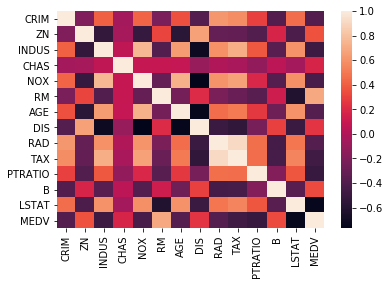

In [34]:
import seaborn as sns

sns.heatmap(boston_df.corr())

## Challenges in Prediction

1. Under Fit - Will not work well on test data. Retraining may be needed to find a better fit.
2. Appropriate Fit
3. Over Fit - model will work really well on training data but won't not be able to perform well with test/new unseen data

__How do you identify if a model is working well for your data or not?__

Solution: Compare the RMSE values for both the test and train data. 

- __Underfitting__ - If the RMSE values are __very high__, then it implies under fitting i.e. the model is under fit and will not model the data properly

- For __Overfitting__, the value of the RMSE for the training data will be much __less than__ the RMSE for the testing data

- If the model is an __appropriate model__, the RMSE value of both the train data and the test data will be less and __almost equal__.

The target is also called the dependent variable

Features are also called independent variables

#### The 3 remaining types of regression - Ridge (aka L2 regularization). Lasso, and ElasticNet are called regularized regression algorithms because they have regularization terms in them to avoid overfitting, multicollinearity (correlation between independent features).

Other types of regression are: Linear, Multiple and Polynomial regression)

# 4. Ridge Regression 

Ridge Regression (L2) is used when there is a problem of multicollinearity or you want to reduce the prediction error e.g. Reducing the RMSE from 5k dollars in our house price prediction in linear regression to say 4k.

By adding a degree of bias to the regression estimates, ridge regression reduces the standard errors i.e. it shifts the predicted line to reduce the error.

__Minimization object = LS object + Lambda*(sum of the square of coefficients)__

where: 
LS object refers to least squares objective
Lambda controls the strength of the penalty term 
Default Lambda value is 1
penalty term = b1^2 + b2^ +....+bn^2 i.e how much you want to penalize your regression model for not predicting correctly

Lambda is a hyperparameter so you need to try different lambda values to see which is the best. Grid search cv is a good technique to determine the best/optimal hyperparameter value to use. Note that there is a limit to the bias to avoid overfitting.

# 5. Lasso Regression/L1 regularization

Lasso Regression(L1) is similar to ridge, but it also performs feature selection.

It will set the coefficient value for features that do not help in decision making very low, potentially zero.

__Minimization object = LS obj + Lambda*(sum of absolute coefficient values)__

i.e. LS obj + lambda*(|b1| + |b2| + |b3| +.......+|bn|)

Lasso regression tends to exclude  variables that are not required from the equation, where as Ridge tends to do better when all variables are present.

# 6. ElasticNet Regression

ElasticNet regression combines the strength of ridge and lasso regression.

lambda1*|variable1| +....+|variablex| __+__ lambda2 * variable1^2 +...+variablex^2

where:

- lambda1*|variable1| +....+|variablex| is lasso penalty

- lambda2 * variable1^2 +...+variablex^2 is ridge penalty

__If you are not sure whether to use lasso or ridge, use ElasticNet__

# Regularization algorithms

## 1. Ridge Regression

In [38]:
from sklearn.linear_model import Ridge

# ridge_reg = Ridge()

ridge_reg = Ridge(alpha=0.02, fit_intercept=False)  # default lambda(alpha) value = 1.0

# fit the data
ridge_reg.fit(X_train, y_train)

# predict
y_test_pred = ridge_reg.predict(X_test)


print('RMSE value of the testing dataset is:')
print(np.sqrt(mean_squared_error(y_test, y_test_pred)))



RMSE value of the testing dataset is:
5.415663321107286


### Comparing the train and test RMSE

In [40]:
# predict with the training dataset
y_train_pred = ridge_reg.predict(X_train)

print('RMSE value of the testing dataset is:')
print(np.sqrt(mean_squared_error(y_train, y_train_pred)))

RMSE value of the testing dataset is:
5.026821360422799


Since the training RMSE and the tesing RMSE values are almost equal and within permissable RMSE value limits for the given problem statment, this model is an __appropriate model__ for the boston dataset.

# 2. Lasso Regression

In [41]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso()

lasso_reg.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [43]:
y_test_pred = lasso_reg.predict(X_test)

print('RMSE value of the testing dataset is:')
print(np.sqrt(mean_squared_error(y_test, y_test_pred)))

RMSE value of the testing dataset is:
6.037132064354421


That's high so let's see if we can reduce the RMSE with an alpha value

In [44]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.02)

lasso_reg.fit(X_train, y_train)

y_test_pred = lasso_reg.predict(X_test)

print('RMSE value of the testing dataset is:')
print(np.sqrt(mean_squared_error(y_test, y_test_pred)))

RMSE value of the testing dataset is:
5.49617389164474


# 3. ElasticNet regression

In [51]:
from sklearn.linear_model import ElasticNet

elastic_reg = ElasticNet(alpha=0.03)   #l1_ratio idle values 0.2-0.6. tab + double shift

elastic_reg.fit(X_train, y_train)


ElasticNet(alpha=0.03, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [52]:
y_test_pred = elastic_reg.predict(X_test)

print('RMSE value of the testing dataset is:')
print(np.sqrt(mean_squared_error(y_test, y_test_pred)))

RMSE value of the testing dataset is:
5.507835456325728
